* Metric: The most eco-friendly neighborhood
    * Submetric 1: air quality

Data set 1: [Allegheny County Air Quality](https://data.wprdc.org/dataset/allegheny-county-air-quality)

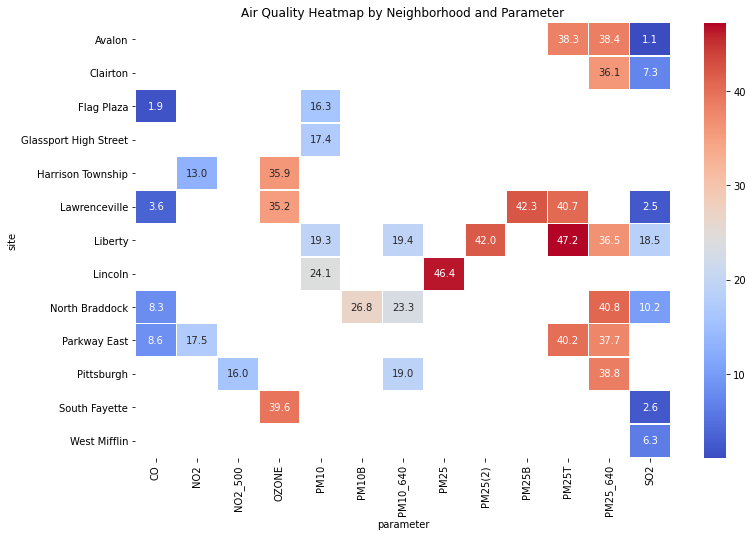

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
airquality = pd.read_csv("airquality.csv")

# Combine 'Lawrenceville' and 'Lawrenceville2' into 'Lawrenceville'
airquality.loc[airquality['site'].str.contains('Lawrenceville'), 'site'] = 'Lawrenceville'

# Combine 'Liberty' and 'Liberty2' into 'Liberty'
airquality.loc[airquality['site'].str.contains('Liberty'), 'site'] = 'Liberty'

# Pivot the dataframe to get 'site' as rows, 'parameter' as columns, and 'index_value' as values
heatmap_data = airquality.pivot_table(index='site', columns='parameter', values='index_value', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Air Quality Heatmap by Neighborhood and Parameter')
plt.show()

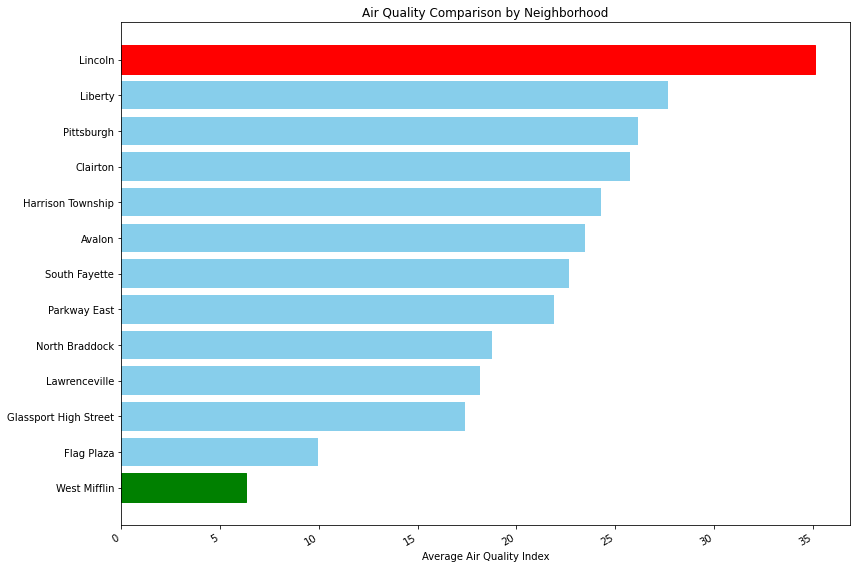

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
airquality = pd.read_csv("airquality.csv")

# Combine 'Lawrenceville' and 'Lawrenceville2' into 'Lawrenceville'
airquality.loc[airquality['site'].str.contains('Lawrenceville'), 'site'] = 'Lawrenceville'

# Combine 'Liberty' and 'Liberty2' into 'Liberty'
airquality.loc[airquality['site'].str.contains('Liberty'), 'site'] = 'Liberty'

# Create a new column 'neighborhood' with complete site names
airquality['neighborhood'] = airquality['site']

# Group by 'neighborhood' and calculate the mean of 'index_value' for each neighborhood
grouped_data = airquality.groupby('neighborhood')['index_value'].mean().reset_index()

# Sort the data by 'index_value' for better visualization
grouped_data = grouped_data.sort_values(by='index_value', ascending=True)

# Increase the figure size
plt.figure(figsize=(12, 8))

# Plot a horizontal bar chart
bars = plt.barh(range(len(grouped_data)), grouped_data['index_value'], color='skyblue')

# Highlight the best and worst neighborhoods
best_neighborhood = grouped_data['neighborhood'].iloc[0]
worst_neighborhood = grouped_data['neighborhood'].iloc[-1]

# Customize the y-axis ticks and labels
plt.yticks(range(len(grouped_data)), grouped_data['neighborhood'])

# Ensure that the complete neighborhood names are displayed
plt.gcf().autofmt_xdate()

# Iterate through the bars to set colors
for i, (bar, neighborhood) in enumerate(zip(bars, grouped_data['neighborhood'])):
    if neighborhood == best_neighborhood:
        bar.set_color('green')
    elif neighborhood == worst_neighborhood:
        bar.set_color('red')

plt.xlabel('Average Air Quality Index')
plt.title('Air Quality Comparison by Neighborhood')
plt.tight_layout()
plt.show()

Based on only the air quality index value submetric, I have come to the conclusion that the most eco friendly neighborhood is West Mifflin because it has the lowest average air quality index value(approximately 6.5). The neighborhood with the highest air quality index value is Lincoln, which has an average of approximately 35. 